# What do students want to know about the Chicago Public School system?

Questions students have about Chicago Public Schools (CPS), and some brief attempts at answering them.

[More information here.](#More-Information)

## Click on a question to jump to it.

* [What percentage of high school graduates pursue college education and earn a degree?](#What-percentage-of-high-school-graduates-pursue-college-education-and-earn-a-degree?)
* [Do CPS ratings actually reflect the success of high school students?](#Do-CPS-ratings-actually-reflect-the-success-of-high-school-students?)
* [How much does the culture of a school affect the students' test scores or GPA?](#How-much-does-the-culture-of-a-school-affect-the-students'-test-scores-or-GPA?)
* [Do the academic scores, such as in the NWEA or SAT, correlate with the behavior that the student presents in the academic environment?](#Do-the-academic-scores,-such-as-in-the-NWEA-or-SAT,-correlate-with-the-behavior-that-the-student-presents-in-the-academic-environment?)
* [How does teacher attendance affect a student's performance?](#How-does-teacher-attendance-affect-a-student's-performance?)
* [How does standardized testing prepare students for the future?](#How-does-standardized-testing-prepare-students-for-the-future?)
* [How does the food in CPS impact the students performance in school?](#How-does-the-food-in-CPS-impact-the-students-performance-in-school?)
* [Do extracurricular activities affect the success of the student?](#Do-extracurricular-activities-affect-the-success-of-the-student?)

The students had many more questions than there was time to answer.
[Click here to jump to a full list of all questions.](#All-Questions)

# What percentage of high school graduates pursue college education and earn a degree?

In [1]:
# Because this is the first question we need to load in the data first.
# If you do not understand what is going on here and other similar-looking sections
# please feel free to ignore them, and skip to the figures and regular text.

# Here we retrieve code we'll use for our analysis
import numpy as np
import pandas as pd
import analysis_helper

# Load the data
combined_df, hs_df = analysis_helper.load_data()

661 school profiles
661 school progress reports


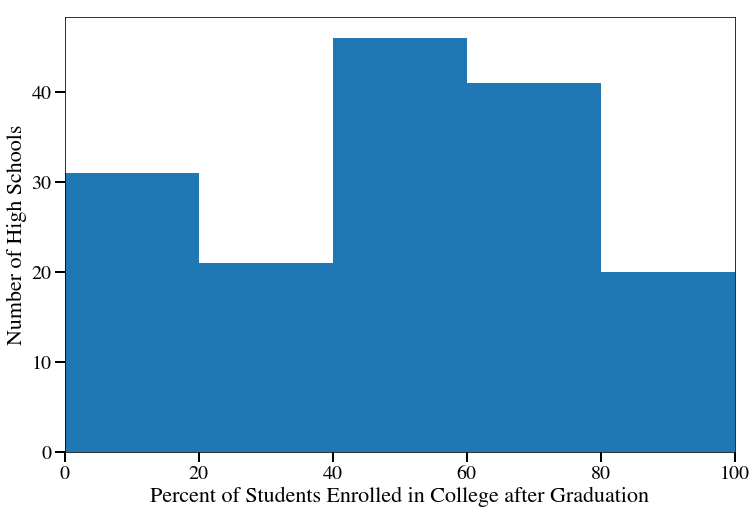

In [2]:
analysis_helper.histogram_plot(
    hs_df,
    'College_Enrollment_School_Pct_Year_2',
    hist_label = 'Percent of Students Enrolled in College after Graduation',
    bins = np.arange( 0., 110., 20. ),
    x_lim = [ 0, 100 ],
    y_label = 'Number of High Schools',
)

### Answer:

As can be seen in the above figure, of 184 high schools, in most high schools more than half of their graduating students enroll in college. However, *in as many as ~50 schools less than 40% of graduating students enroll in college*.
Further *in only 20 schools* more than 80% of graduating students enroll in college.

##### Follow-up Questions:

* What percent of students actually follow through and earn a degree? The data actually contains information about this as well.
* As can be seen by the shape of the plot, there are roughly two types of schools here: the ones where the enrollment percentage is <40% and the ones where the the enrollment percentage is >40%. What distinguishes these two groups?
* Why are there schools that enroll <20% of students in college?

# Do CPS ratings actually reflect the success of high school students?

One way to approach this question is to look at the percent of students that enroll in colleges after leaving highly-rated schools.

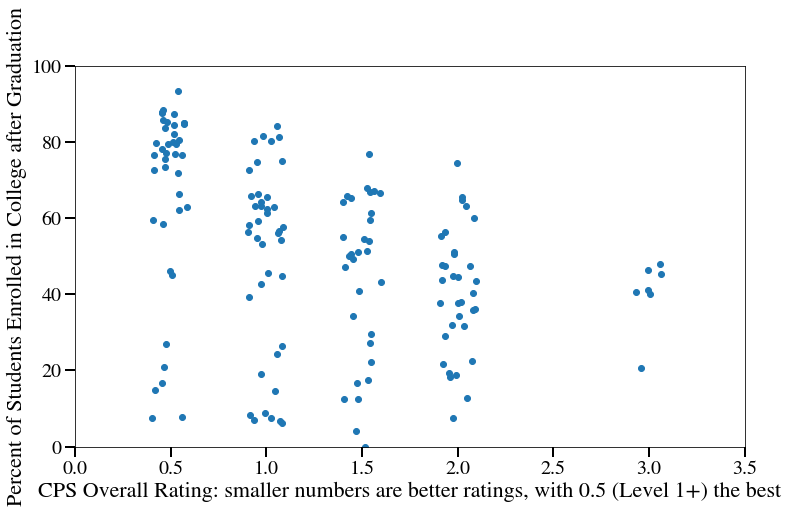

In [16]:
overall_rating_mapping = {
    'Inability to Rate': -1,
    'Level 3': 3.,
    'Level 3+': 2.5,
    'Level 2': 2.,
    'Level 2+': 1.5,
    'Level 1': 1.,
    'Level 1+': 0.5,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Overall_Rating', 
    'College_Enrollment_School_Pct_Year_2',
    x_mapping = overall_rating_mapping,
    x_label = 'CPS Overall Rating: smaller numbers are better ratings, with 0.5 (Level 1+) the best',
    y_label = 'Percent of Students Enrolled in College after Graduation',
    jitter = 0.1,
    x_lim = [ 0., 3.5 ],
    y_lim = [ 0, 100 ],
)

### Answer:

Highly-rated schools tend to enroll a larger fraction of their students in college on, on average. This suggests that rating does correlate with a traditional measure of success. However, there are over 15 highly-rated schools that enroll less than 30% of their students in college.

##### Follow-up Questions:

* Why are there highly-rated schools that still don't enroll many students in college? Are these schools focused on preparing students for a career that doesn't require college? Are these schools that greatly improve the lives of students in difficult circumstances, even if many of those students still don't go to college? Is there some other reason?
* How does CPS rating reflect the number of students that persist through college?
* What would change if employment post-graduation was also accounted for?

# How much does the culture of a school affect the students' test scores or GPA?

While this question was about students' test scores and GPA, because we were already looking at the college enrollment data we used that instead. However, in another question we looked at [the relationship between standardized testing and college enrollment](#How-does-standardized-testing-prepare-students-for-the-future?).

Our measure of school culture was the "Culture Climate Rating".
The Culture Climate Rating is a score of the school's culture and climate based on the My Voice, My School 5Essentials survey. According to CPS: "For more information on this survey and additional measures of school culture and climate visit [cps.5-essentials.org](https://cps.5-essentials.org/2016)".

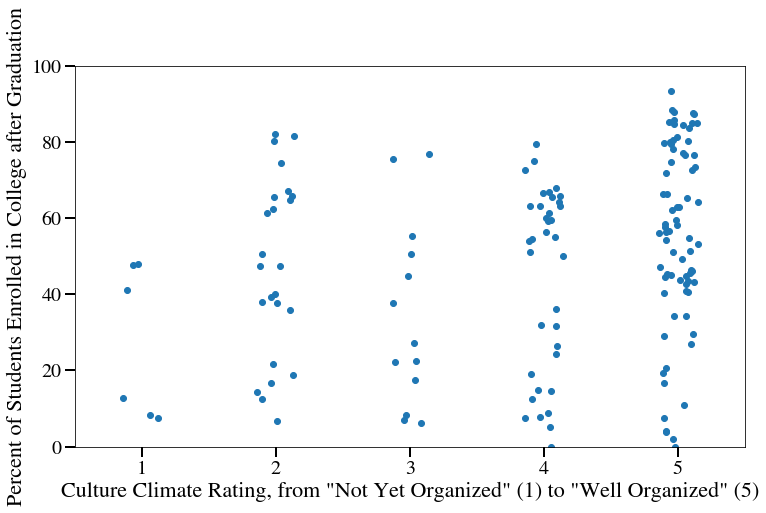

In [17]:
# This maps the qualitative assessment to a quantiative score
culture_climate_rating_mapping = {
    'NOT ENOUGH DATA': -1.,
    'NOT YET ORGANIZED': 1.,
    'PARTIALLY ORGANIZED': 2.,
    'MODERATELY ORGANIZED': 3.,
    'ORGANIZED': 4.,
    'WELL ORGANIZED': 5.,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Culture_Climate_Rating', 
    'College_Enrollment_School_Pct_Year_2',
    x_mapping = culture_climate_rating_mapping,
    x_label = 'Culture Climate Rating, from "Not Yet Organized" (1) to "Well Organized" (5)',
    y_label = 'Percent of Students Enrolled in College after Graduation',
    jitter = 0.15,
    x_lim = [ 0.5, 5.5 ],
    y_lim = [ 0, 100 ],
)

### Answer:

There's no clear correlation between school culture and success in enrolling students in colleges.
A more careful quantitative analysis may reveal a trend, but the trend will be subtle.

##### Follow-up Questions:

* Are the schools that have a poor school culture but a high rate of college enrollment schools that are very high pressure?
* Are the "Well Organized" schools that enroll <20% of students in college seen here the same schools that get a high overall rating?

## Do the academic scores, such as in the NWEA or SAT, correlate with the behavior that the student presents in the academic environment?

To approach this question we used the "Culture Climate Rating" as a measure of student behavior in the academic environment. 
We then compared the Culture Climate Rating with a measure of the school-wide performance on the NWEA math assessment.

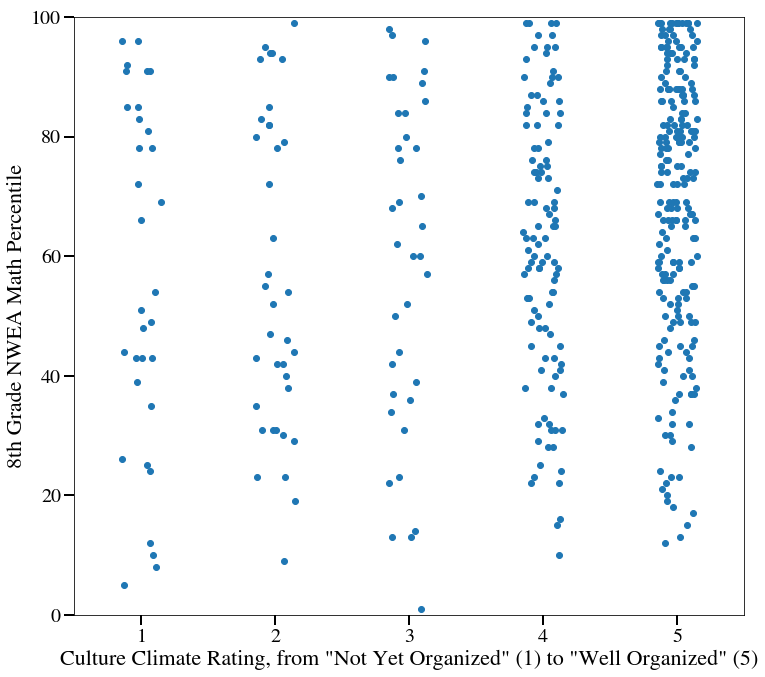

In [3]:
# This maps the qualitative assessment to a quantiative score
culture_climate_rating_mapping = {
    'NOT ENOUGH DATA': -1.,
    'NOT YET ORGANIZED': 1.,
    'PARTIALLY ORGANIZED': 2.,
    'MODERATELY ORGANIZED': 3.,
    'ORGANIZED': 4.,
    'WELL ORGANIZED': 5.,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Culture_Climate_Rating', 
    'NWEA_Math_Attainment_Grade_8_Pct',
    x_mapping = culture_climate_rating_mapping,
    x_label = 'Culture Climate Rating, from "Not Yet Organized" (1) to "Well Organized" (5)',
    y_label = '8th Grade NWEA Math Percentile',
    jitter = 0.15,
    x_lim = [ 0.5, 5.5 ],
    y_lim = [ 0, 100 ],
)

### Answer:

There doesn't appear to be a strong correlation between school culture and performance on the NWEA math exam. This *may* imply that school culture is not as important as other factors in exam performance. However, there may be some more subtle trends. 

##### Follow-up Questions:

* Can we do a more careful job of quantifying to what extent culture and standardized exams are correlated, beyond our estimate by eye?
* If culture really isn't important for exam performance, why would that be?

# How does teacher attendance affect a student's performance?

Here we used the schools' performance in the NWEA math assessment as a measure of student performance. Note that while the question was about a single student's performance, we can only approach this question by looking at the behavior of the whole student body for a given school.

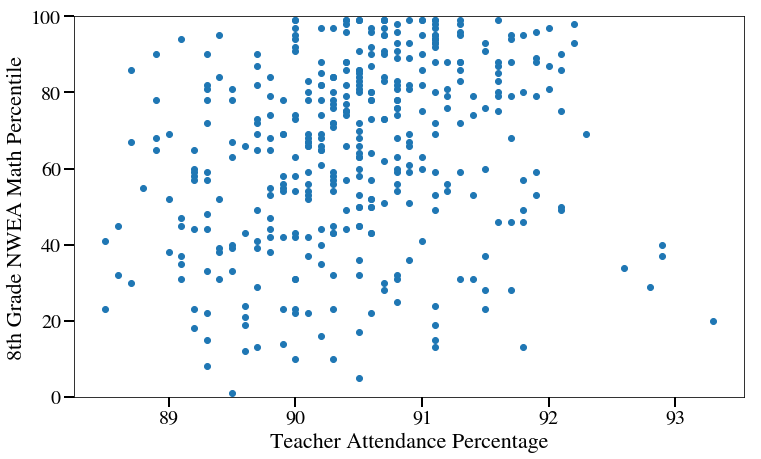

In [19]:
analysis_helper.scatter_plot( 
    combined_df, 
    'Teacher_Attendance_Year_2_Pct', 
    'NWEA_Math_Attainment_Grade_8_Pct',
    x_label = 'Teacher Attendance Percentage',
    y_label = '8th Grade NWEA Math Percentile',
    y_lim = [ 0, 100 ],
)

### Answer:

While there's a lot of variation, there's a clear correlation: schools with higher teacher attendance do better on the NWEA exams.

##### Follow-up Questions:

* The dataset wasn't very descriptive, so what is "Teacher Attendance Percentage"? The average percent of time a teacher attends school?
* Why are the five schools with the highest teacher attendance all schools with poor NWEA performance?

# How does standardized testing prepare students for the future?

To approach this question we compared the Student Attainment Rating to the percent of students enrolled in college after graduation.
The Student Attainment Rating is a measure of performance on standardized tests, where a value of 50 means the school is performing at an average level compared to the rest of the nation.

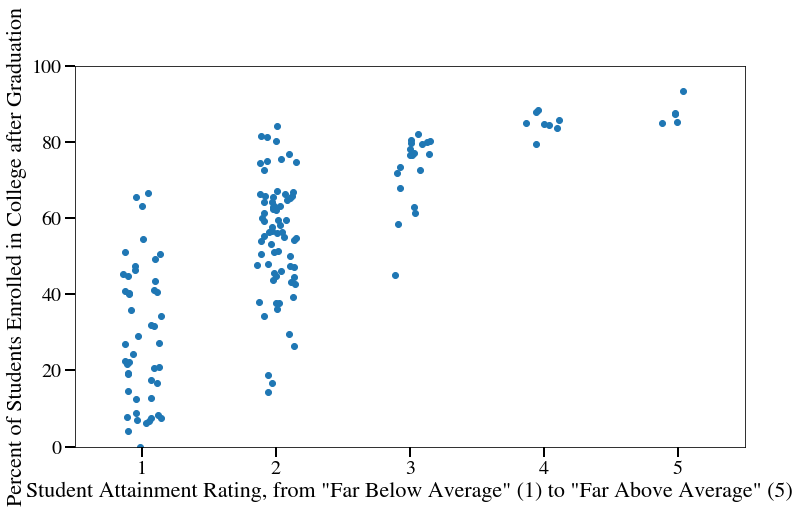

In [20]:
# This maps the qualitative assessment to a quantiative score
student_attainment_rating_mapping = {
    'NO DATA AVAILABLE': -1,
    'FAR BELOW AVERAGE': 1.,
    'BELOW AVERAGE': 2.,
    'AVERAGE': 3.,
    'ABOVE AVERAGE': 4.,
    'FAR ABOVE AVERAGE': 5.,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Student_Attainment_Rating', 
    'College_Enrollment_School_Pct_Year_2',
    x_mapping = student_attainment_rating_mapping,
    x_label = 'Student Attainment Rating, from "Far Below Average" (1) to "Far Above Average" (5)',
    y_label = 'Percent of Students Enrolled in College after Graduation',
    jitter = 0.15,
    x_lim = [ 0.5, 5.5 ],
    y_lim = [ 0, 100 ],
)

### Answer:

There's clearly a strong correlation between school performance on standardized tests and the number of students enrolled in college. However, the schools that fall below average on standardized tests have vary widely in the percentage of students enrolled in college.

##### Follow-up Questions:

* What is the national average percentage of students that enroll in college after graduating? How do the college enrollments here compare to the rest of the nation? In particular, for the schools that are below average in testing, are they also below average in college enrollment, compared to the rest of the US?
* Among the schools that are "Far Above Average", are they also highly rated in other categories?

## How does the food in CPS impact the students performance in school?

To approach this question, we tried to use [the Healthy CPS certification](https://www.cps.edu/oshw/Pages/HealthyCPSIndicator.aspx) as a measure of the food environment. However...

In [2]:
n_hs_certified = ( hs_df['Healthy_School_Certification'] == 'Achieved' ).sum()
print( '{} high schools have Healthy CPS certifications!'.format( n_hs_certified ) )

0 high schools have Healthy CPS certifications!


### Answer:

As you can see, **no high schools have the Healthy CPS certification**. So we stopped this line of exploration here.

##### Follow-up Questions:

* Why do no high schools have the healthy CPS certification?
* What schools *do* have the healthy CPS certification?
* Are there other measures of food environment?

# Do extracurricular activities affect the success of the student?

To approach this question we compared the schools' "Creative School Certification" to their performance on standardized tests, in particular the NWEA.
Here we used the "Creative School Certification" as a measure of the availability and prominence of extracurriculars.

According to CPS, the Creative School Certification measures how well a school "meets the goals and priorities of the CPS Arts Education Plan including Staffing & Instruction, Partnerships, Community & Culture and Budget & Planning. To learn more, visit  www.cpsarts.org/creative-schools-certification ."

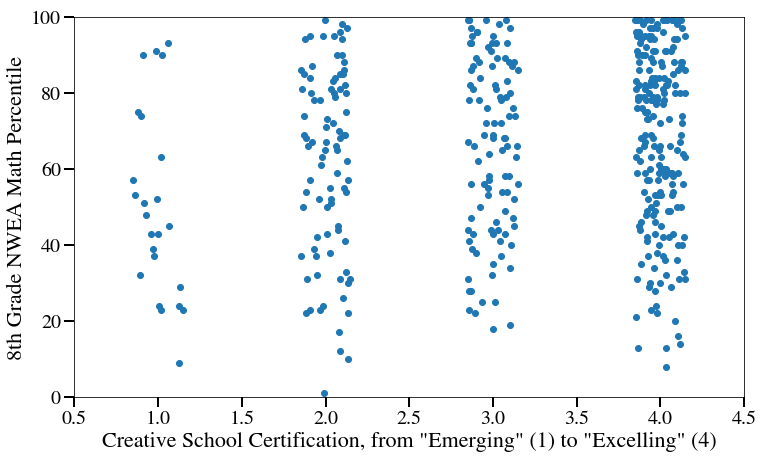

In [27]:
# This maps the qualitative assessment to a quantiative score
creative_mapping = {
    'INCOMPLETE DATA': -1.,
    'EMERGING': 1.,
    'DEVELOPING': 2.,
    'STRONG': 3.,
    'EXCELLING': 4.,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Creative_School_Certification', 
    'NWEA_Math_Attainment_Grade_8_Pct',
    x_mapping = creative_mapping,
    x_label = 'Creative School Certification, from "Emerging" (1) to "Excelling" (4)',
    y_label = '8th Grade NWEA Math Percentile',
    jitter = 0.15,
    x_lim = [ 0.5, 4.5 ],
    y_lim = [ 0, 100 ],
)

### Answer:

There may be a correlation here, but if so it's relatively subtle.
It's not immediately clear that schools with high creativity do well on standardized tests, but there is a particularly noticeable group of schools that get a certification of "Excelling" while also being in the 80th percentil or better on the NWEA score.

##### Follow-up Questions:

* Is there a way we can do a more careful job of looking for the trend quantitatively?
* Does the school creativity correlate with other measures like school culture, which don't clearly correlate with performance on standardized tests?

# All Questions

Below are questions we didn't have time to approach.
That's not because they're not interesting though: every single one is a very interesting question.
Note that students came up with questions individually, so some questions may overlap.

* How well do selective enrollment schools succeed in enrolling their student into selective college in comparison to IB schools?
* Does the school's ranking affect the students scores?
* Does the zip code have any affect on the performance of a student?
* How do immigrants’ high school success rate compare to an average student citizen?
* What gender, between boys and girls, tend to read more and does that lead to higher test scores on standardized tests?
* To what extent does the school type affect student performance?
* How does the student attendance affect ACT growth in 11th grade?
* Are 8th grade NWEA scores indicative of the success rate students will have in high school?
* How does the teachers attendance effect the overall growth of a students NWEA scores?
* Does Chicago Public Schools take into consideration the mental health of students when rating the school on its performance?
* How does the amount of student write-ups affect the schools overall performance?
* Is there a trend of students that increase/ grow from NWEA scores?
* What impact does collaboration among teachers have on CPS students?
* What impact may parental involvement have on a student's academic performance?
* Do SATs scores reflect what students really know?
* Does high school location affect college persistence?
* Why do schools promote healthy eating but still give junk food?
* Do standardized tests actually reflect on a student's academic ability?
* Does the amount of students in a classroom affect academic growth?

# More Information

This page is the result of an exploration by students from the Northwestern Academy for Chicago Public Schools.
Over the course of three ~30 minute sessions (with ~10-15 students per session) students filtered through [the CPS 2016 school progress reports](https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/cp7s-7gxg) and came up with a list of things they wanted to know.
The students then worked together with vault admins to try and answer their questions during that time.
This webpage is the result.

A few things to note:
* Blocks of code are scattered throughout. These are the actual pieces of code used for the exploration, and are kept as an example, but are not the main point. [The full code is available here.](https://github.com/avault/chicago_public_schools)
* The questions were copied verbatim from the students and the raw plots and results were fully obtained within sessions themselves. However, the results are presented here in a polished form.
* Each student question is accompanied is accompanied by some "Follow-up Questions" that suggest next steps or further extensions.
* The work here is preliminary, and as such there may be issues in the exploration or the interpretation. Many things could also be done much more carefully (e.g. considering elementary, middle, and high school fully separately).
* Many of the figures here plot discrete data on the x axis. In most cases we've introduced "jitter" in the figure to prevent points overlapping one another, even though they all have the same x value.

This expedition was led by Zach Hafen.

# [**Back to the top**](#What-do-students-want-to-know-about-the-Chicago-Public-School-system?)